In [ ]:
#test data

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage as ni
import scipy.misc as mi
#from PIL import Image
from scipy import misc
import glob
images_test=[]
output_test=[]
directory='/home/harikrishna/Documents/Deep Learning/Midterm/Test/'
for image_path in glob.glob(directory+"*.png"):
    currentimage = misc.imread(image_path)
    currentresize = misc.imresize(image,(128,128))
    if 'Building' in image_path:
        images_test.append(currentresize)
        output_test.append([1,0])
    else:
        images_test.append(currentresize)
        output_test.append([0,1])
        
        #print(image.shape)
        

NameError: name 'image' is not defined

In [76]:
#For reg nets
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage as ni
import scipy.misc as mi
from PIL import Image
from scipy import misc
import glob
images_test=[]
output_test=[]
directory='/home/harikrishna/Documents/Deep Learning/Midterm/Test/'
for image_path in glob.glob(directory+"*.png"):
    currentimage = misc.imread(image_path,mode='L')
    currentresize = misc.imresize(currentimage,(128,128))
    if 'Building' in image_path:
        images_test.append(currentresize)
        output_test.append([1,0])
    else:
        images_test.append(currentresize)
        output_test.append([0,1])
#plt.imshow(images_test[0])
images_np_array_test = np.array(images_test)
output_np_array_test = np.array(output_test)
        #print(image.shape)

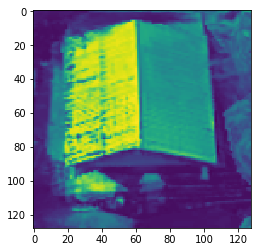

In [25]:

plt.imshow(images_np_array_train[0])

In [57]:
output_np_array_test = np.array(output_test) 

In [58]:
images_np_array.shape

(16, 128, 128, 3)

In [59]:
#training data

In [60]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage as ni
import scipy.misc as mi
from PIL import Image
from scipy import misc
import glob
images_train=[]
output_train=[]
directory='/home/harikrishna/Documents/Deep Learning/Midterm/Data/'
for image_path in glob.glob(directory+"*.png"):
    currentimage = misc.imread(image_path)
    currentresize = misc.imresize(image,(128,128))
    if 'Building' in image_path:
        images_train.append(currentresize)
        output_train.append(1)
    else:
        images_train.append(currentresize)
        output_train.append(0)
        
        #print(image.shape)
        

In [11]:
##For regular nets
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage as ni
import scipy.misc as mi
from PIL import Image
from scipy import misc
import glob
images_train=[]
output_train=[]
directory='/home/harikrishna/Documents/Deep Learning/Midterm/Data/'
for image_path in glob.glob(directory+"*.png"):
    currentimage = misc.imread(image_path,mode='L')
    currentresize = misc.imresize(currentimage,(128,128))
    if 'Building' in image_path:
        images_train.append(currentresize)
        output_train.append([1,0])
    else:
        images_train.append(currentresize)
        output_train.append([0,1])
images_np_array_train = np.array(images_train)
output_np_array_train = np.array(output_train)
        #print(image.shape)

In [20]:
images_test=[]
output_test=[]
directory='/home/harikrishna/Documents/Deep Learning/Midterm/Test/'
for image_path in glob.glob(directory+"*.png"):
    currentimage = misc.imread(image_path,mode='L')
    currentresize = misc.imresize(currentimage,(128,128))
    if 'Building' in image_path:
        images_test.append(currentresize)
        output_test.append([1,0])
    else:
        images_test.append(currentresize)
        output_test.append([0,1])
    #plt.imshow(images_test[0])
images_np_array_test = np.array(images_test)
output_np_array_test = np.array(output_test)

In [21]:
images_np_array_test.shape

(34, 128, 128)

In [5]:
import tensorflow as tf
#Regular Deep nets Initialization
x=tf.placeholder(tf.float32,[None,16384])
y_=tf.placeholder(tf.float32,[None,2])

W=tf.Variable(tf.zeros([16384,2]))
b=tf.Variable(tf.zeros([2]))

y=tf.nn.softmax(tf.matmul(x,W)+b)
cross_entropy= -tf.reduce_sum(y_*tf.log(y))

train_step=tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

In [14]:
init=tf.initialize_all_variables()

#creating a session
sess=tf.Session()
sess.run(init)

for i in range(1000):
    for j in range(len(images_train)):
        batch_xs,batch_ys=np.reshape(images_np_array_train[j],(-1,16384)),np.reshape(output_np_array_train[j],(-1,2))
    sess.run(train_step,feed_dict={x:batch_xs,y_:batch_ys})
print(sess.run(accuracy,feed_dict={x:np.reshape(images_np_array_test,(-1,16384)),y_:np.reshape(output_np_array_test,(-1,2))}))


Instructions for updating:
Use `tf.global_variables_initializer` instead.


InvalidArgumentError: Incompatible shapes: [102] vs. [34]
	 [[Node: Equal = Equal[T=DT_INT64, _device="/job:localhost/replica:0/task:0/cpu:0"](ArgMax, ArgMax_1)]]

Caused by op 'Equal', defined at:
  File "/usr/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/harikrishna/.local/lib/python3.5/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/home/harikrishna/.local/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/harikrishna/.local/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "/home/harikrishna/.local/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/home/harikrishna/.local/lib/python3.5/site-packages/tornado/ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "/home/harikrishna/.local/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/harikrishna/.local/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/harikrishna/.local/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/harikrishna/.local/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/harikrishna/.local/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/harikrishna/.local/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/harikrishna/.local/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/harikrishna/.local/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "/home/harikrishna/.local/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/harikrishna/.local/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/harikrishna/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/harikrishna/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/harikrishna/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-5-2769a561d603>", line 14, in <module>
    correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/gen_math_ops.py", line 672, in equal
    result = _op_def_lib.apply_op("Equal", x=x, y=y, name=name)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/op_def_library.py", line 768, in apply_op
    op_def=op_def)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/ops.py", line 2336, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/ops.py", line 1228, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): Incompatible shapes: [102] vs. [34]
	 [[Node: Equal = Equal[T=DT_INT64, _device="/job:localhost/replica:0/task:0/cpu:0"](ArgMax, ArgMax_1)]]


In [22]:
init = tf.initialize_all_variables()

sess = tf.Session()
sess.run(init)

batchsize = 20
for i in range(1000):
    for j in range(0,len(images_np_array_train), batchsize):
        batch_xs,batch_ys=np.reshape(images_np_array_train[j:j+batchsize], (-1, 16384)),np.reshape(output_np_array_train[j:j+batchsize], (-1, 2))
    sess.run(train_step,feed_dict={x: batch_xs,y_: batch_ys})

print(sess.run(accuracy,feed_dict={x:np.reshape(images_np_array_test, (-1, 16384)),y_:np.reshape(output_np_array_test, (-1, 2))}))

Instructions for updating:
Use `tf.global_variables_initializer` instead.
0.794118
